In [21]:
import pandas as pd
import os
import glob
import numpy as np
from pathlib import Path
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [22]:
# get current working directory to construct absolute path to CMS-DE-SynPuf-VB/downloads/beneficiary_summaries folder
cwd = os.getcwd()
ls = cwd.split(os.sep)

In [23]:
# construct paths to subdirectories in downloads\beneficiary_summaries
path_bs_2008 = ls[0] + os.sep + '**' + os.sep + 'CMS-DE-SynPuf-VB' + os.sep + 'downloads' + os.sep + 'beneficiary_summaries' + os.sep + '2008' + os.sep + '*.csv'
path_bs_2009 = ls[0] + os.sep + '**' + os.sep + 'CMS-DE-SynPuf-VB' + os.sep + 'downloads' + os.sep + 'beneficiary_summaries' + os.sep + '2009' + os.sep + '*.csv'
path_bs_2010 = ls[0] + os.sep + '**' + os.sep + 'CMS-DE-SynPuf-VB' + os.sep + 'downloads' + os.sep + 'beneficiary_summaries' + os.sep + '2010' + os.sep + '*.csv'

In [24]:
# use glob to filter out the files in each subdirectory with the extension .csv
all_bs_2008_files = glob.glob(path_bs_2008, recursive=True)
all_bs_2009_files = glob.glob(path_bs_2009, recursive=True)
all_bs_2010_files = glob.glob(path_bs_2010, recursive=True)

# however, because glob will find the file in every subdirectory, files will have
# several paths. there is a need to establish a base part of a url so we can have 
# only one instance of each file

# arbitrarily select the first string in one glob list and use that to establish
# the base path with which to extract paths from the larger glob lists

full_path = all_bs_2008_files[0]
split_path = full_path.split(os.sep)
tgt = split_path.index('CMS-DE-SynPuf-VB')
base_path = os.sep.join(split_path[0:tgt]) + os.sep

valid_bs_2008_files = [x for x in all_bs_2008_files if x.startswith(base_path)]
valid_bs_2009_files = [x for x in all_bs_2009_files if x.startswith(base_path)]
valid_bs_2010_files = [x for x in all_bs_2010_files if x.startswith(base_path)]

In [46]:
# create a consolidated df for each year
bs_2008_df = pd.concat([pd.read_csv(bs_2008_file) for bs_2008_file in valid_bs_2008_files])
bs_2009_df = pd.concat([pd.read_csv(bs_2009_file) for bs_2009_file in valid_bs_2009_files])
bs_2010_df = pd.concat([pd.read_csv(bs_2010_file) for bs_2010_file in valid_bs_2010_files])

# leverage separate dfs to add YEAR column as instructed
bs_2008_df['YEAR'] = '2008'
bs_2009_df['YEAR'] = '2009'
bs_2010_df['YEAR'] = '2010'

# create list with all dfs
bs_ls = [bs_2008_df, bs_2009_df, bs_2010_df]

# use pd.concat to merge the dfs in the list
merged_bs_df = pd.concat(bs_ls, ignore_index=True)

# keep columns specified in assignment document
merged_bs_df = merged_bs_df[['YEAR', 'DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT',
                             'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'SP_STATE_CODE',
                             'BENE_HMO_CVRAGE_TOT_MONS']]

# create copy to write to csv
merged_bs_df_cpy = merged_bs_df.copy()

# display 
display(merged_bs_df)

,YEAR,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_HMO_CVRAGE_TOT_MONS
0,2008,00013D2EFD8E45D1,19230501,NaN,1,1,26,12
1,2008,00016F745862898F,19430101,NaN,1,1,39,0
2,2008,0001FDD721E223DC,19360901,NaN,2,1,39,0
3,2008,00021CA6FF03E670,19410601,NaN,1,5,6,0
4,2008,00024B3D2352D2D0,19360801,NaN,1,1,52,0
...,...,...,...,...,...,...,...,...
6760515,2010,FFFB2D0ED0E52160,19460901,NaN,2,1,4,0
6760516,2010,FFFC020559E4F5B7,19311101,NaN,2,1,23,0
6760517,2010,FFFE39796B08C919,19400801,NaN,1,1,39,0
6760518,2010,FFFE4E347796686D,19330101,NaN,1,1,50,0


In [26]:
print("Total rows in 2008 consolidated beneficiary summary dataframe: %2d" % (len(bs_2008_df))) # should be 2,326,856 per 
                                                                                                # the assignment document, is consistent
print("Total rows in 2009 consolidated beneficiary summary dataframe: %2d" % (len(bs_2009_df))) # should be 2,291,320 per 
                                                                                                # the assignment document, is consistent
print("Total rows in 2010 consolidated beneficiary summary dataframe: %2d" % (len(bs_2010_df))) # should be 2,255,098 per 
                                                                                                # the assignment document, missing 112,754 rows
                                                                                                # and we know 2010 sample 1 data is inaccessible 
                                                                                                # due to the URL error

Total rows in 2008 consolidated beneficiary summary dataframe: 2326856
Total rows in 2009 consolidated beneficiary summary dataframe: 2291320
Total rows in 2010 consolidated beneficiary summary dataframe: 2142344


In [27]:
# let's see the average length of 2010 dfs, rounded to two decimal places, to see if this makes sense
avg_2010 = sum([len(pd.read_csv(bs_2010_file)) for bs_2010_file in all_bs_2010_files]) / len(all_bs_2010_files)
print("Average length of 2010 beneficiary summary dfs: %5.2f" % (avg_2010))

Average length of 2010 beneficiary summary dfs: 112754.95


There are 112,754 missing rows, and the average length of the 2010 beneficiary summary dfs is very close to this value,
so we can reasonably assume we are missing an amount of data BENE_DEATH_DTconsistent with the likely size of the missing 2010 sample 1 data.

Let's reformat the `BENE_BIRTH_DT` and `BENE_DEATH_DT` columns to increase readability:

Health outcomes tend to vary by race and locale, so let's see what the average lifespans were for each of these categories.

In [28]:
# standardize date columns to avoid any pesky decimals
def clean_for_dt(col):
    if col == 'nan':
        return np.nan
    else:
        return col[0:8]

In [29]:
merged_bs_df['BENE_BIRTH_DT'] = merged_bs_df['BENE_BIRTH_DT'].astype(str).map(lambda x: clean_for_dt(x))
merged_bs_df['BENE_DEATH_DT'] = merged_bs_df['BENE_DEATH_DT'].astype(str).map(lambda x: clean_for_dt(x))

In [30]:
def to_dt(col):
    if col == 'nan':
        return np.nan
    else:
        return datetime.datetime.strptime(col, '%Y%m%d')

In [31]:
merged_bs_df['BENE_BIRTH_DT'] = merged_bs_df['BENE_BIRTH_DT'].astype(str).map(lambda x: to_dt(x))
merged_bs_df['BENE_DEATH_DT'] = merged_bs_df['BENE_DEATH_DT'].astype(str).map(lambda x: to_dt(x))
merged_bs_df

,YEAR,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_HMO_CVRAGE_TOT_MONS
0,2008,00013D2EFD8E45D1,1923-05-01,NaT,1,1,26,12
1,2008,00016F745862898F,1943-01-01,NaT,1,1,39,0
2,2008,0001FDD721E223DC,1936-09-01,NaT,2,1,39,0
3,2008,00021CA6FF03E670,1941-06-01,NaT,1,5,6,0
4,2008,00024B3D2352D2D0,1936-08-01,NaT,1,1,52,0
...,...,...,...,...,...,...,...,...
6760515,2010,FFFB2D0ED0E52160,1946-09-01,NaT,2,1,4,0
6760516,2010,FFFC020559E4F5B7,1931-11-01,NaT,2,1,23,0
6760517,2010,FFFE39796B08C919,1940-08-01,NaT,1,1,39,0
6760518,2010,FFFE4E347796686D,1933-01-01,NaT,1,1,50,0


Now, I'll create a column called `AGE_DEATH` measured in years:

In [32]:
merged_bs_df['AGE_DEATH'] = round((merged_bs_df['BENE_DEATH_DT'] - merged_bs_df['BENE_BIRTH_DT']) / np.timedelta64(1, 'Y'), 2)

Per [resdac.org](https://resdac.org/cms-data/variables/beneficiary-race-code-ffs)'s reference for CMS data, the `BENE_RACE_CD` mappings are as follows:

`0: Unknown`
`1: White`
`2: Black`
`3: Other`
`4: Asian`
`5: Hispanic`
`6: North American Native`

In [33]:
death_by_race = merged_bs_df.groupby(['BENE_RACE_CD', 'YEAR'])['AGE_DEATH'].mean()
death_by_locale = merged_bs_df.groupby(['SP_STATE_CODE', 'YEAR'])['AGE_DEATH'].mean()

In [34]:
print(death_by_race)

BENE_RACE_CD  YEAR
1             2008    73.239453
              2009    74.061961
              2010    75.003468
2             2008    69.341193
              2009    69.949952
              2010    70.375020
3             2008    72.532058
              2009    73.450014
              2010    74.011582
5             2008    72.496819
              2009    73.230566
              2010    74.675861
Name: AGE_DEATH, dtype: float64


The lowest average age of death belonged to the Black race, which is consistent with findings from medical literature. however, there was some marginal improvement in ages of death across all demographics from 2008 to 2010, which is ideal for a developed country.

In [35]:
print(death_by_locale)

SP_STATE_CODE  YEAR
1              2008    71.079204
               2009    71.656168
               2010    72.063064
2              2008    68.670133
               2009    72.327097
                         ...    
53             2009    71.206611
               2010    71.620805
54             2008    69.062808
               2009    72.654594
               2010    71.685103
Name: AGE_DEATH, Length: 156, dtype: float64


Now, I want to see if the three shortest lifespans, in *any* year, in the `death_by_locale` groupby belong to some of the poorer states in the United States.

In [36]:
bottom_3 = death_by_locale.nsmallest(3)
bottom_3

SP_STATE_CODE  YEAR
2              2008    68.670133
54             2008    69.062808
53             2008    69.425269
Name: AGE_DEATH, dtype: float64

Per [Wikipedia.org](https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations), here are the mappings for the above `SP_STATE_CODE` entries:
`2: AK (Alaska)`
`54: WV (West Virginia)`
`53: WA (Washington)`

The only state I would expect to be here is West Virginia, but I am unsure why Washington is here. Let's visualize the data and see if that helps.

In [37]:
locale_df = death_by_locale.to_frame().reset_index()
locale_df

,SP_STATE_CODE,YEAR,AGE_DEATH
0,1,2008,71.079204
1,1,2009,71.656168
2,1,2010,72.063064
3,2,2008,68.670133
4,2,2009,72.327097
...,...,...,...
151,53,2009,71.206611
152,53,2010,71.620805
153,54,2008,69.062808
154,54,2009,72.654594


In [38]:
locale_2008 = locale_df[locale_df['YEAR'] == '2008'].reset_index(drop=True)
locale_2009 = locale_df[locale_df['YEAR'] == '2009'].reset_index(drop=True)
locale_2010 = locale_df[locale_df['YEAR'] == '2010'].reset_index(drop=True)

Text(0.5, 0, 'SP_STATE_CODE')

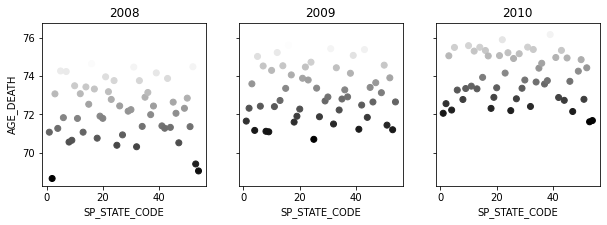

In [39]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10,3))
ax[0].title.set_text('2008')
ax[0].scatter(x = locale_2008['SP_STATE_CODE'], y = locale_2008['AGE_DEATH'], c = locale_2008['AGE_DEATH'], cmap = 'gray')
ax[0].set_xlabel('SP_STATE_CODE')
ax[0].set_ylabel('AGE_DEATH')

ax[1].title.set_text('2009')
ax[1].scatter(x = locale_2009['SP_STATE_CODE'], y = locale_2009['AGE_DEATH'], c = locale_2009['AGE_DEATH'], cmap = 'gray')
ax[1].set_xlabel('SP_STATE_CODE')

ax[2].title.set_text('2010')
ax[2].scatter(x = locale_2010['SP_STATE_CODE'], y = locale_2010['AGE_DEATH'], c = locale_2010['AGE_DEATH'], cmap = 'gray')
ax[2].set_xlabel('SP_STATE_CODE')

Interestingly, the states with an `SP_STATE_CODE` slightly greater than 0 or less than 50 also happen to be more rural and spread-out areas where access to quality medical care is likely more sparse, as reflected by the lowest `AGE_DEATH` values mostly occurring at these bounds.

Save `merged_bs_df` to csv for easy recall in `inpatient_claims_eda.ipynb`:

In [47]:
merged_bs_df_cpy.to_csv('merged_beneficiary_summary.csv', index=False)